# Model Predictions

This notebook runs through a sample model prediction for a single image. This methodology is used in the app.py file, which generates a prototype application to determine what class a crop leaf falls into given the image of it.

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Conv2D , Dropout, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from PIL.Image import core as image
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
import tensorflow as tf
import image_processing

Using TensorFlow backend.


In [2]:
data_path = 'PlantVillage-Dataset/raw_image_data/color'
leaf_type_list = []
for folder in os.listdir(data_path):
    leaf_type_list.append(folder)
class_list = sorted(leaf_type_list)
class_map_dict = dict(zip(list(range(38)), class_list))

In [3]:
# Loading Model
model = load_model('../crop_leaves_disease_model.h5')

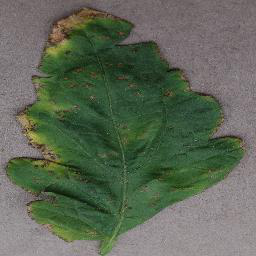

In [4]:
# Display Image
img_path = 'PlantVillage-Dataset/raw_image_data/color/Tomato___Bacterial_spot/06ac210d-bdb1-4224-9053-c218cb14fa60___GCREC_Bact.Sp 3220.JPG'
Image.open(img_path)

In [5]:
# Define function to test image and select predicted class
def image_prediction(img_path):
    arr = image_processing.image_to_array(img_path)
    norm = image_processing.pixel_normalization(arr)
    final = image_processing.pixel_centering(norm).reshape((1, 256, 256, 3))
    pred = model.predict(final)
    result_dict = dict(enumerate(pred[0]))
    int_class = max(result_dict, key = result_dict.get)
    crop_leaf_class = class_map_dict[int_class]
    return crop_leaf_class

In [5]:
# Predict the class of the image
image_processing.image_prediction(img_path, model, class_map_dict)

'Tomato___Bacterial_spot'